<a href="https://colab.research.google.com/github/Rhayem1920/PCA-for-Yield-Curve-Interest-Rate/blob/main/PCA_for_Yield_Curve_%26_Interest_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Yield Curve Construction**

In this case study we use principal component analysis (PCA) to generate the typical movements of a yield curve


**Problem Definition**

Our goal in this case study is to use dimensionality reduction techniques to generate the “typical” movements of a yield curve. The data used for this case study is obtained from Quandl.

Quandl is a premier source for financial, economic and alternative datasets. We use the data of 11 tenors (from 1 month to 30 years) of the treasury curves. The frequency of the data is daily and the data is available from 1960 onwards


In [2]:
! pip install quandl

In [5]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import quandl
import matplotlib as mpl
#Import Model Packages 
from sklearn.decomposition import PCA

# ignore warnings  
import warnings
warnings.filterwarnings('ignore')


# rectifying visualistaion's parameters to have pretty plots
font={'size': 14,
        'weight' : 'bold',
        'family':'monospace'} # weight could be book,bold etc ...
mpl.rc('font',**font)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('lines',linewidth=5,c='black')
plt.rcParams["figure.figsize"] = (16,9)
sns.set_style('darkgrid')

In [8]:
dataset=pd.read_csv('/content/Quandl.csv',sep=',')
dataset.head()

,DATE,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
0,2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
1,2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2,2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
3,2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
4,2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19


## **Exploratory and Inspection Step**

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    4078 non-null   object 
 1   SWAP1   4078 non-null   float64
 2   SWAP2   4078 non-null   float64
 3   SWAP3   4078 non-null   float64
 4   SWAP4   4078 non-null   float64
 5   SWAP5   4078 non-null   float64
 6   SWAP7   4078 non-null   float64
 7   SWAP10  4078 non-null   float64
 8   SWAP30  4078 non-null   float64
dtypes: float64(8), object(1)
memory usage: 286.9+ KB


In [10]:
dataset.describe()

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,2.105755,2.390218,2.688190,2.953082,3.181395,3.534772,3.872545,4.394841
std,1.913386,1.832076,1.765902,1.699581,1.636723,1.534743,1.445819,1.331056
min,0.250000,0.340000,0.420000,0.560000,0.730000,1.100000,1.280000,1.670000
25%,0.490000,0.780000,1.060000,1.370000,1.660000,2.140000,2.552500,3.190000
50%,1.330000,1.800000,2.310000,2.770000,3.125000,3.610000,4.070000,4.620000
75%,3.507500,3.920000,4.197500,4.450000,4.580000,4.830000,5.020000,5.390000
max,7.130000,7.220000,7.250000,7.270000,7.290000,7.320000,7.360000,7.300000


 ### **Data Visualization**

Let us look at the movement of the yield curve.



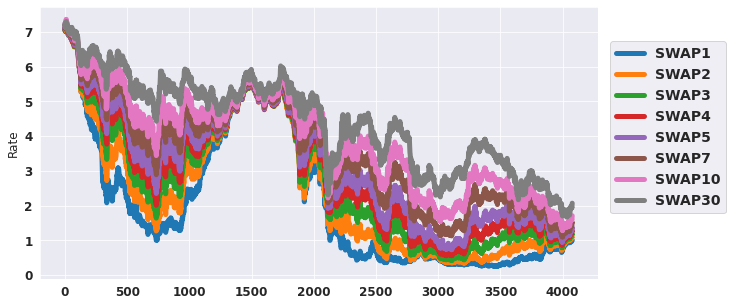

In [11]:
dataset.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()





In the next step we look at the correlation.


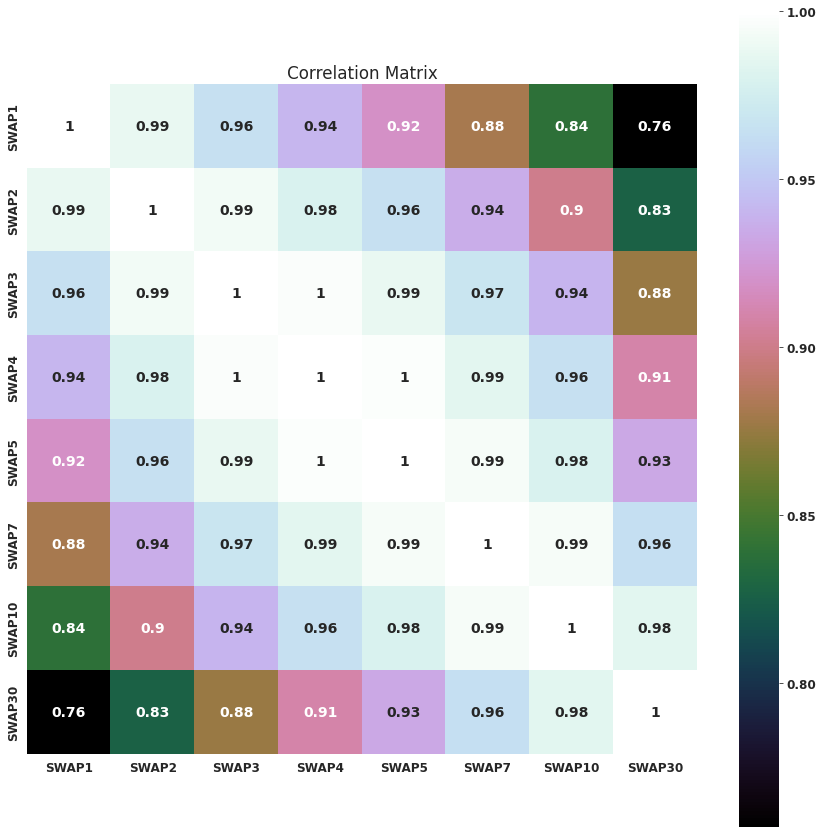

In [12]:

# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')





As it can be seen by the picture above there is a significant positive correlation between the stocks.

### **Data Preparation**



We check for the NAs in the data, either drop them or fill them with the mean of the column and the steps are same as mentioned in previ‐ ous case studies.



In [13]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())



Null Values = False


In [21]:
dataset=dataset.set_index('DATE')

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 2000-07-03 to 2016-10-28
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWAP1   4078 non-null   float64
 1   SWAP2   4078 non-null   float64
 2   SWAP3   4078 non-null   float64
 3   SWAP4   4078 non-null   float64
 4   SWAP5   4078 non-null   float64
 5   SWAP7   4078 non-null   float64
 6   SWAP10  4078 non-null   float64
 7   SWAP30  4078 non-null   float64
dtypes: float64(8)
memory usage: 286.7+ KB




All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. We use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).



In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)
# summarize transformed data
dataset.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)



,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
DATE,,,,,,,,
2000-07-03,2.610480,2.603804,2.538283,2.481456,2.437244,2.388463,2.329384,2.137782
2000-07-05,2.573891,2.549214,2.481648,2.422611,2.382249,2.329814,2.260211,2.077672




**Visualising the standardised dataset**

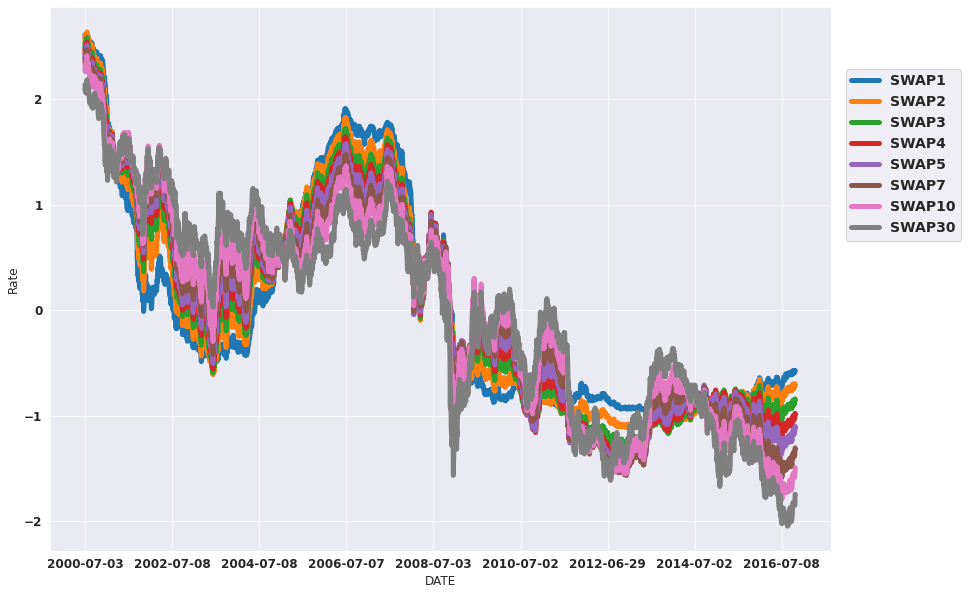

In [24]:


rescaledDataset.plot(figsize=(14,10))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()



## **Evaluate Algorithms and Models**

### **Model Evaluation- Applying Principle Component Analysis**

As the next step We create a function to compute Principle Component Analysis from Sklearn. This function computes an inversed elbow chart that shows the amount of principle components and how many of them explain the variance treshold.



In [26]:
pca = PCA()
PrincipalComponent=pca.fit(rescaledDataset)





#### **Explained Variance using PCA**

,Explained Variance_Top 5
0,94.96%
1,99.63%
2,99.96%
3,100.00%
4,100.00%


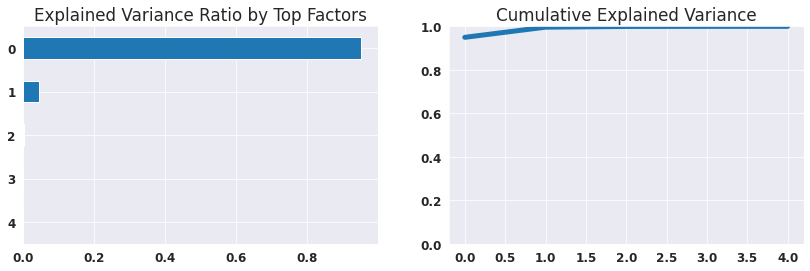

In [27]:


NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');

# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)



Indeed, the first principal component accounts for 84.4% of variance, with the second principal component getting 98.44% and the third 99.53%. The first 3 principal components account for, cumulatively, 99.5% of all movements in the data. Hence, in terms of dimensionality reduction, the first 3 principal components are representative of the data.

### **Intuition Behind the Principal Components**

We first have a function to determine the weights of each principal component. We then perform the visualization of the principal components.



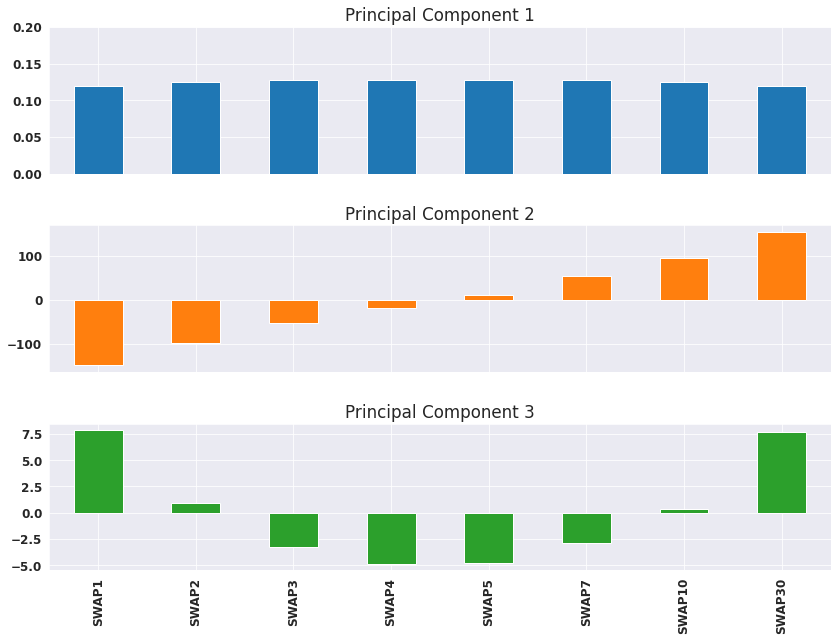

In [28]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

NumComponents=3    
        
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);



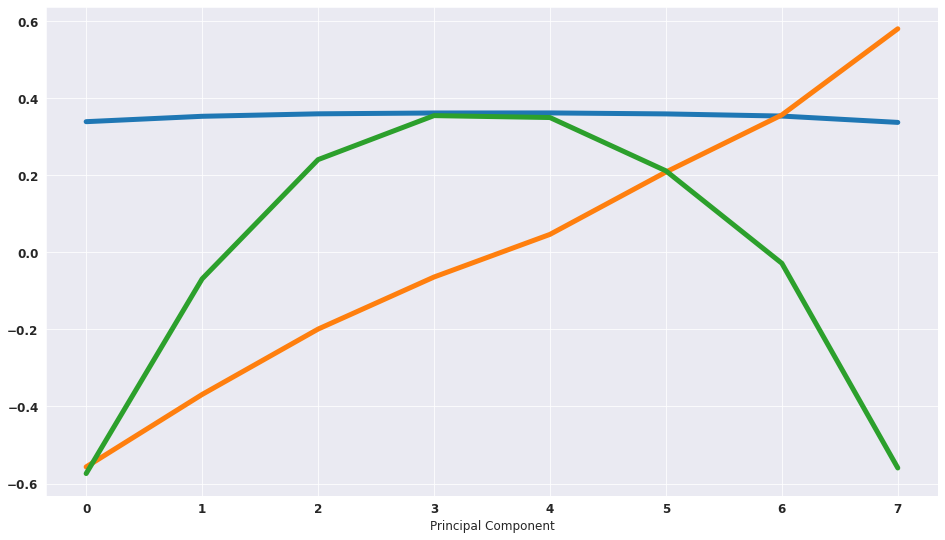

In [29]:
plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()



Looking at the the interpretation of the first three principal components, they correspond to:

**Principal Component 1**: Directional movements in the yield curve. These are movements that shift the entire yield curve up or down.

**rincipal Component 2:** Slope movements in the yield curve. These are movements that steepen or flatten (change the first derivative wrt maturity) the entire yield curve.

**Principal Component 3:** Curvature movements in the yield curve. These are movements that change the curvature (or the second derivative wrt maturity) of the entire yield curve.

## **Reconstructing the curve using Principal Components**

In [30]:
pca.transform(rescaledDataset)[:,:2]


array([[ 6.90444649, -0.39424533],
       [ 6.7452975 , -0.41306936],
       [ 6.86345795, -0.3974701 ],
       ...,
       [-3.16563695, -1.12490258],
       [-3.08780577, -1.06164871],
       [-3.10066989, -1.06006086]])



Using the simple matrix reconstruction, we can generate an approximation/almost exact replica of the initial data.

Mechanically PCA is just a matrix multiplication:

Y=XW,

where Y is your principal components, X is input data, and W is a matrix of coefficients.

The only trick here is that your matrix of coefficients is quite special: you can use it to recover the original matrix.

X=YW′,



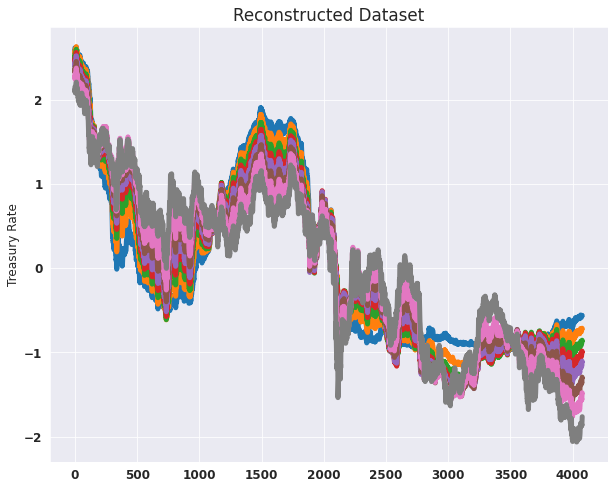

In [31]:
nComp=3
reconst= pd.DataFrame(np.dot(pca.transform(rescaledDataset)[:,:nComp], pca.components_[:nComp,:]),columns=dataset.columns)
plt.figure(figsize=(10,8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.show()





Figure above shows the replicated treasury rate chart.

**Conclusion:**

We demonstrated the efficiency of dimensionality reduction and principal components analysis in reducing the number of dimension and coming up with new intuitive feature.

The first three principal components explain more than 99.5% of the variation and represent directional movements, slope movements, and curvature movements respectively. Overall, by using principal component analysis, analyzing the eigen vectors and understanding the intuition behind them, we demonstrated how the implementation of a dimensionality reduction lead to fewer intuitive dimensions in the yield curve.
